# SDXL Lightning - Generate High Quality 1024px Images

In [ ]:
!pip install diffusers

In [ ]:
import torch
from diffusers import StableDiffusionXLPipeline, UNet2DConditionModel, EulerDiscreteScheduler
from safetensors.torch import load_file

In [ ]:
# download SDXL Lightning model
!wget https://huggingface.co/ByteDance/SDXL-Lightning/resolve/main/sdxl_lightning_2step_unet.safetensors


In [ ]:
model_id = "stabilityai/stable-diffusion-xl-base-1.0"

# Load model
unet = UNet2DConditionModel.from_config(model_id, subfolder="unet").to("cuda", torch.float16)

unet.load_state_dict(load_file("sdxl_lightning_2step_unet.safetensors", device="cuda"))

In [ ]:
pipe = StableDiffusionXLPipeline.from_pretrained(model_id,
                                                 unet=unet,
                                                 torch_dtype=torch.float16,
                                                 variant="fp16").to("cuda")

In [ ]:
# Ensure sampler uses "trailing" timesteps
pipe.scheduler = EulerDiscreteScheduler.from_config(pipe.scheduler.config, timestep_spacing="trailing")

In [ ]:
# image generation
prompt = "A cafe with stunning beach view"

image = pipe(prompt,
             num_inference_steps=2,
             width = 1024,
             height = 1024,
             guidance_scale=0).images[0]

  0%|          | 0/2 [00:00<?, ?it/s]

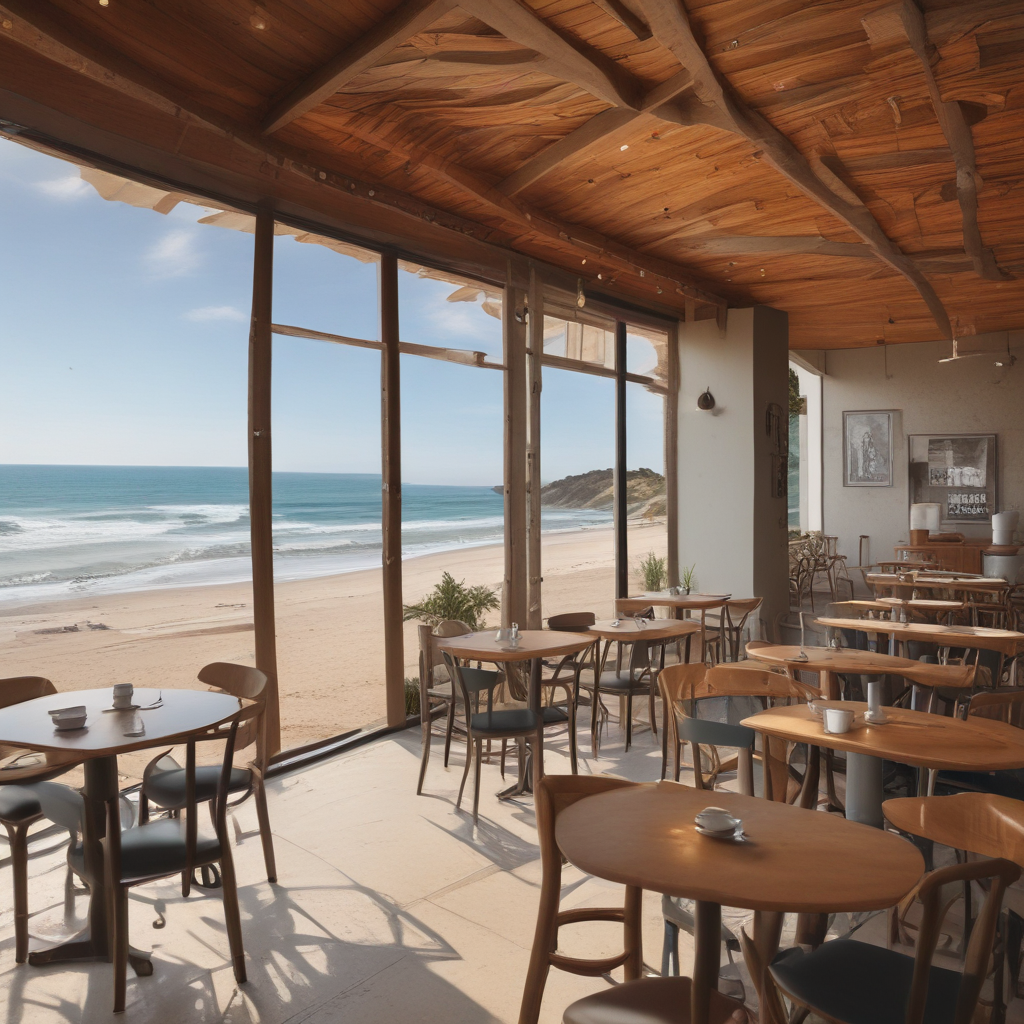

In [ ]:
# display generated image
image